## 합성곱 신경망

In [1]:
import tensorflow as tf

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

In [5]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

In [6]:
train_scaled, val_scaled, train_target, val_target = \
train_test_split(train_scaled, train_target, test_size=0.2)

In [7]:
train_scaled.shape

(48000, 28, 28, 1)

In [8]:
model = keras.Sequential()

In [9]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

C:\Users\2-15\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(keras.layers.MaxPooling2D(2))

In [11]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [12]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┓
┃ Layer       ┃ Output   ┃ Par… ┃
┃ (type)      ┃ Shape    ┃    # ┃
┡━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━┩
│ conv2d      │ (None,   │  320 │
│ (Conv2D)    │ 28, 28,  │      │
│             │ 32)      │      │
├─────────────┼──────────┼──────┤
│ max_poolin… │ (None,   │    0 │
│ (MaxPoolin… │ 14, 14,  │      │
│             │ 32)      │      │
├─────────────┼──────────┼──────┤
│ conv2d_1    │ (None,   │ 18,… │
│ (Conv2D)    │ 14, 14,  │      │
│             │ 64)      │      │
├─────────────┼──────────┼──────┤
│ max_poolin… │ (None,   │    0 │
│ (MaxPoolin… │ 7, 7,    │      │
│             │ 64)      │      │
├─────────────┼──────────┼──────┤
│ flatten     │ (None,   │    0 │
│ (Flatten)   │ 3136)    │      │
├─────────────┼──────────┼──────┤
│ dense       │ (None,   │ 313… │
│ (Dense)     │ 100)     │      │
├─────────────┼──────────┼──────┤
│ dropout     │ (None,   │    0 │
│ (Dropout)   │ 100)     │      │
├─────────────┼──────────┼──────┤
│ dense_1     │ (None,   │ 1,0… │
│ (Dense)     │ 10)      │      │
└─────────────┴──────────┴──────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# keras.utils.plot_model(model)

In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cp_cb = keras.callbacks.ModelCheckpoint(
    'model.keras',
    save_best_only=True
)

es_cb = keras.callbacks.EarlyStopping(
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    train_scaled, 
    train_target, 
    epochs=20, 
    validation_data=(val_scaled, val_target),
    callbacks=[es_cb, cp_cb]
)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7832 - loss: 0.5946 - val_accuracy: 0.8898 - val_loss: 0.3098
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8958 - loss: 0.2853 - val_accuracy: 0.9010 - val_loss: 0.2731
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9129 - loss: 0.2353 - val_accuracy: 0.9109 - val_loss: 0.2431
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9259 - loss: 0.2013 - val_accuracy: 0.9193 - val_loss: 0.2243
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9362 - loss: 0.1736 - val_accuracy: 0.9122 - val_loss: 0.2425
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9449 - loss: 0.1439 - val_accuracy: 0.9191 - val_loss: 0.2251


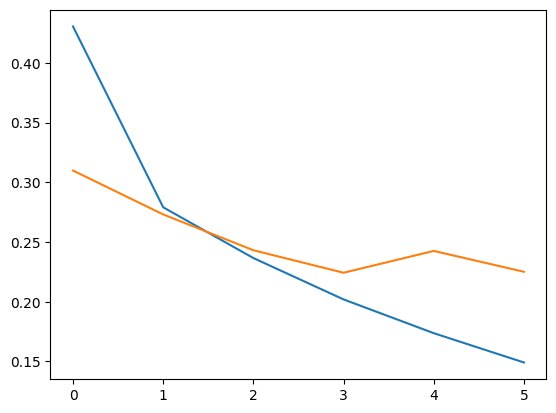

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [18]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9174 - loss: 0.2315


[0.2242635041475296, 0.9193333387374878]

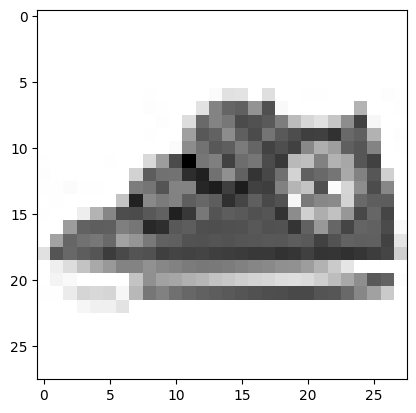

In [19]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [20]:
import numpy as np
np.round(model.predict(val_scaled[:5]), decimals=2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.96, 0.  , 0.03],
       [0.01, 0.  , 0.  , 0.97, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [21]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [22]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9109 - loss: 0.2488


[0.2452167421579361, 0.9110999703407288]

In [23]:
test_input.shape

(10000, 28, 28)